In [1]:
!pip install nltk

In [2]:
!pip install sentencepiece

In [3]:
from google.colab import files

uploaded = files.upload()

Saving socialmedia_relevant_cols.csv to socialmedia_relevant_cols.csv


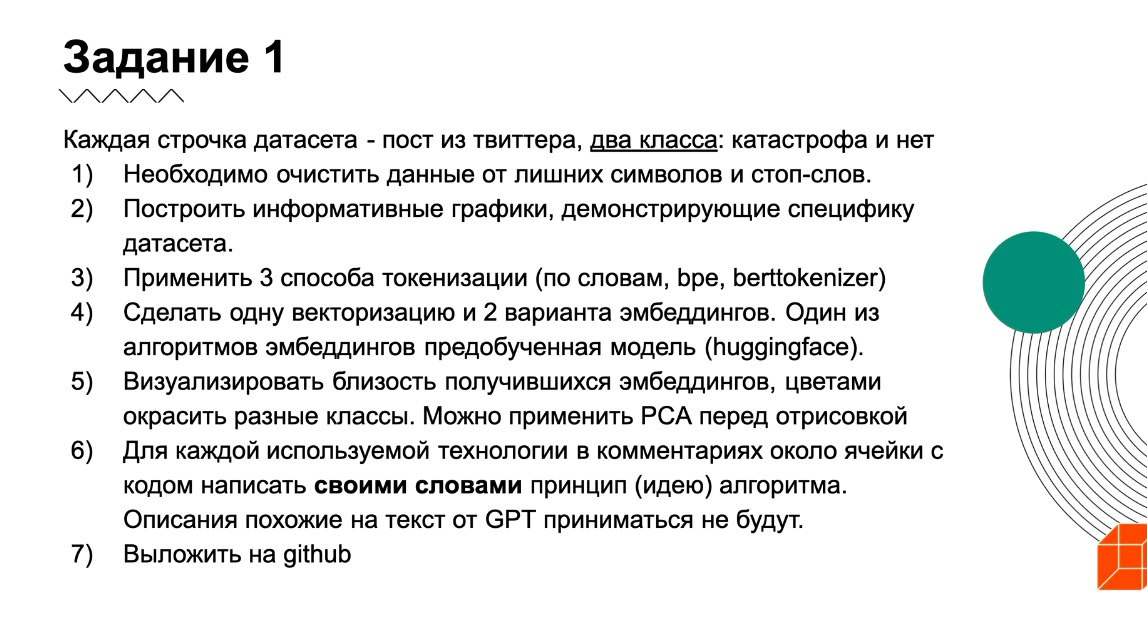

Импортируем все необходимое

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

#1. Очищаем от лишних данных и стоп слов

In [6]:
df = pd.read_csv("socialmedia_relevant_cols.csv", encoding='unicode_escape')
df

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"Heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1
...,...,...,...
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant,1
10872,Police investigating after an e-bike collided ...,Relevant,1
10873,The Latest: More Homes Razed by Northern Calif...,Relevant,1
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant,1


In [7]:
# убираем хештеги и ники
def clean_text(text):
    pattern = r'\S*[@#]\S*'
    cleaned_text = re.sub(pattern, '', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

df['cleaned_text'] = df['text'].apply(clean_text)

df # можно сравнить данные

,text,choose_one,class_label,cleaned_text
0,Just happened a terrible car crash,Relevant,1,Just happened a terrible car crash
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,Our Deeds are the Reason of this May ALLAH For...
2,"Heard about #earthquake is different cities, s...",Relevant,1,"Heard about is different cities, stay safe eve..."
3,"there is a forest fire at spot pond, geese are...",Relevant,1,"there is a forest fire at spot pond, geese are..."
4,Forest fire near La Ronge Sask. Canada,Relevant,1,Forest fire near La Ronge Sask. Canada
...,...,...,...,...
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
10872,Police investigating after an e-bike collided ...,Relevant,1,Police investigating after an e-bike collided ...
10873,The Latest: More Homes Razed by Northern Calif...,Relevant,1,The Latest: More Homes Razed by Northern Calif...
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant,1,MEG issues Hazardous Weather Outlook (HWO) htt...


In [8]:
df = df.reindex(columns=['cleaned_text', 'choose_one', 'class_label'])
df

,cleaned_text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this May ALLAH For...,Relevant,1
2,"Heard about is different cities, stay safe eve...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1
...,...,...,...
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant,1
10872,Police investigating after an e-bike collided ...,Relevant,1
10873,The Latest: More Homes Razed by Northern Calif...,Relevant,1
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant,1


In [9]:
df = df.rename(columns={'cleaned_text': 'text'})

In [10]:
# убираем ссылки
def remove_http_https(text):
    return ' '.join(word for word in text.split() if not re.match(r'http[s]?://', word))

df['text'] = df['text'].apply(remove_http_https)
df

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this May ALLAH For...,Relevant,1
2,"Heard about is different cities, stay safe eve...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1
...,...,...,...
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,Relevant,1
10872,Police investigating after an e-bike collided ...,Relevant,1
10873,The Latest: More Homes Razed by Northern Calif...,Relevant,1
10874,MEG issues Hazardous Weather Outlook (HWO),Relevant,1


In [11]:
# убираем знаки препинания и делаем текст маленькими буквами
df['text'] = df['text'].replace(r'[^\w\s]',' ',regex=True).replace(r'\s+',' ',regex=True).str.lower()
df

,text,choose_one,class_label
0,just happened a terrible car crash,Relevant,1
1,our deeds are the reason of this may allah for...,Relevant,1
2,heard about is different cities stay safe ever...,Relevant,1
3,there is a forest fire at spot pond geese are ...,Relevant,1
4,forest fire near la ronge sask canada,Relevant,1
...,...,...,...
10871,m1 94 01 04 utc 5km s of volcano hawaii,Relevant,1
10872,police investigating after an e bike collided ...,Relevant,1
10873,the latest more homes razed by northern califo...,Relevant,1
10874,meg issues hazardous weather outlook hwo,Relevant,1


In [12]:
# убираем стоп-слова при помощи библиотеки nltk
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
from nltk.corpus import stopwords
stopwords_eng = stopwords.words("english")

In [14]:

df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_eng)]))
df # можно посмотреть разницу в данных


,text,choose_one,class_label,text_without_stopwords
0,just happened a terrible car crash,Relevant,1,happened terrible car crash
1,our deeds are the reason of this may allah for...,Relevant,1,deeds reason may allah forgive us
2,heard about is different cities stay safe ever...,Relevant,1,heard different cities stay safe everyone
3,there is a forest fire at spot pond geese are ...,Relevant,1,forest fire spot pond geese fleeing across str...
4,forest fire near la ronge sask canada,Relevant,1,forest fire near la ronge sask canada
...,...,...,...,...
10871,m1 94 01 04 utc 5km s of volcano hawaii,Relevant,1,m1 94 01 04 utc 5km volcano hawaii
10872,police investigating after an e bike collided ...,Relevant,1,police investigating e bike collided car littl...
10873,the latest more homes razed by northern califo...,Relevant,1,latest homes razed northern california wildfir...
10874,meg issues hazardous weather outlook hwo,Relevant,1,meg issues hazardous weather outlook hwo


In [15]:
df = df.reindex(columns=['text_without_stopwords', 'choose_one', 'class_label'])
df = df.rename(columns={'text_without_stopwords': 'text'})
df

,text,choose_one,class_label
0,happened terrible car crash,Relevant,1
1,deeds reason may allah forgive us,Relevant,1
2,heard different cities stay safe everyone,Relevant,1
3,forest fire spot pond geese fleeing across str...,Relevant,1
4,forest fire near la ronge sask canada,Relevant,1
...,...,...,...
10871,m1 94 01 04 utc 5km volcano hawaii,Relevant,1
10872,police investigating e bike collided car littl...,Relevant,1
10873,latest homes razed northern california wildfir...,Relevant,1
10874,meg issues hazardous weather outlook hwo,Relevant,1


#2. Посторить графики со спецификой датасета

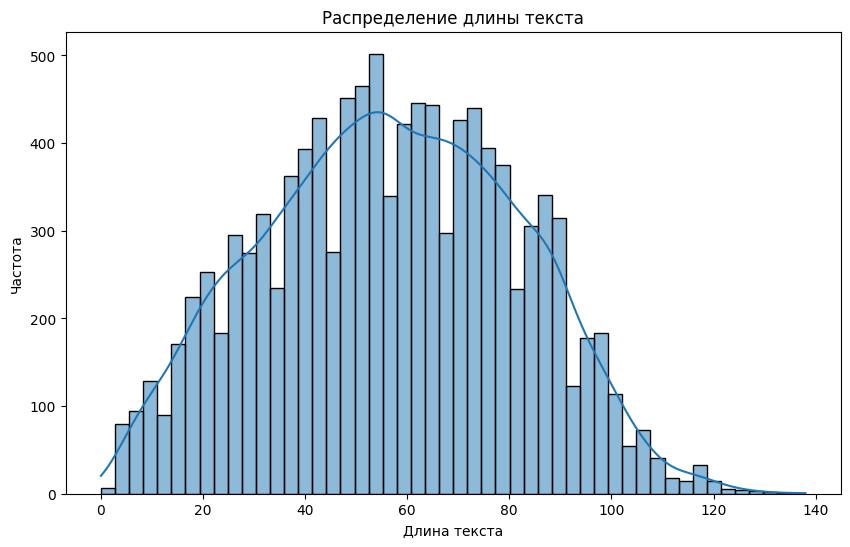

In [16]:
# гистограмма показывает распределение длин сообщений
df['text_length'] = df['text'].dropna().apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Распределение длины текста')
plt.xlabel('Длина текста')
plt.ylabel('Частота')
plt.show()

На графике выше мы можем убедится, что это твиты, т.к. максимальная длина сообщений ~ 140 символов

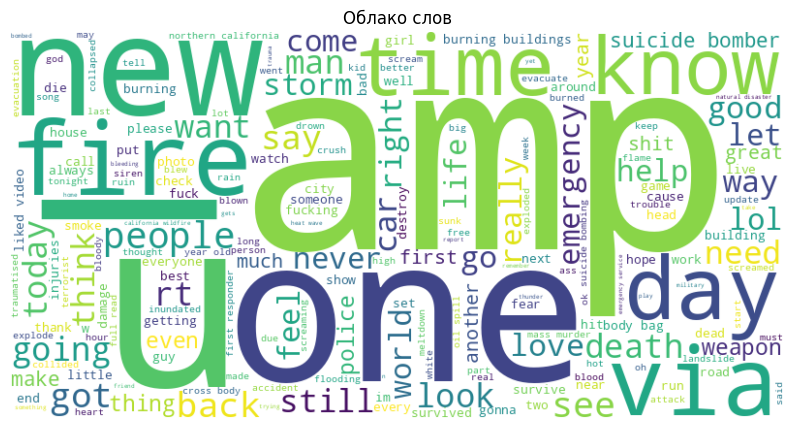

In [80]:
from wordcloud import WordCloud
text = " ".join(review for review in df.text.dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов')
plt.show()

#3. Токенезация


## 3.1 Токенезация по словам

In [17]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

df['tokens'] = df['text'].apply(tokenize_text)
df

,text,choose_one,class_label,text_length,tokens
0,happened terrible car crash,Relevant,1,27,"[happened, terrible, car, crash]"
1,deeds reason may allah forgive us,Relevant,1,33,"[deeds, reason, may, allah, forgive, us]"
2,heard different cities stay safe everyone,Relevant,1,41,"[heard, different, cities, stay, safe, everyone]"
3,forest fire spot pond geese fleeing across str...,Relevant,1,61,"[forest, fire, spot, pond, geese, fleeing, acr..."
4,forest fire near la ronge sask canada,Relevant,1,37,"[forest, fire, near, la, ronge, sask, canada]"
...,...,...,...,...,...
10871,m1 94 01 04 utc 5km volcano hawaii,Relevant,1,34,"[m1, 94, 01, 04, utc, 5km, volcano, hawaii]"
10872,police investigating e bike collided car littl...,Relevant,1,116,"[police, investigating, e, bike, collided, car..."
10873,latest homes razed northern california wildfir...,Relevant,1,56,"[latest, homes, razed, northern, california, w..."
10874,meg issues hazardous weather outlook hwo,Relevant,1,40,"[meg, issues, hazardous, weather, outlook, hwo]"


## 3.2 BPE токенезация

In [19]:
df = df.reindex(columns=['text', 'class_label'])
df

,text,class_label
0,happened terrible car crash,1
1,deeds reason may allah forgive us,1
2,heard different cities stay safe everyone,1
3,forest fire spot pond geese fleeing across str...,1
4,forest fire near la ronge sask canada,1
...,...,...
10871,m1 94 01 04 utc 5km volcano hawaii,1
10872,police investigating e bike collided car littl...,1
10873,latest homes razed northern california wildfir...,1
10874,meg issues hazardous weather outlook hwo,1


In [20]:
text_column = 'text'
corpus = " ".join(df[text_column].dropna().astype(str).tolist()) # соединяем все тексты в один корпус

In [21]:
corpus_path = '/content/corpus.txt'
with open(corpus_path, 'w', encoding='utf-8') as f:
    f.write(corpus)

In [22]:
model_prefix = '/content/bpe_model'

model_path = f"{model_prefix}.model"

In [25]:
import sentencepiece as spm



In [29]:
spm.SentencePieceTrainer.train(input=corpus_path, model_prefix=model_prefix, vocab_size=100, model_type='bpe')

RuntimeError: Internal: src/trainer_interface.cc(429) [!sentences_.empty()] 

#4. Векторизация и эмбендинги

##4.1 TF-IDF

In [32]:
df = df.reindex(columns=['text', 'class_label'])
df

,text,class_label
0,happened terrible car crash,1
1,deeds reason may allah forgive us,1
2,heard different cities stay safe everyone,1
3,forest fire spot pond geese fleeing across str...,1
4,forest fire near la ronge sask canada,1
...,...,...
10871,m1 94 01 04 utc 5km volcano hawaii,1
10872,police investigating e bike collided car littl...,1
10873,latest homes razed northern california wildfir...,1
10874,meg issues hazardous weather outlook hwo,1


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["text"])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

df_tfidf = pd.concat([df, tfidf_df], axis=1)

df_tfidf

,text,class_label,00,000,0000,00am,00end,00pm,01,02,...,î¾cnbc,î¾fedex,î¾i,î¾m,î¾was,îàîàîà,îâ,îå,öekdar,ùp
0,happened terrible car crash,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,deeds reason may allah forgive us,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,heard different cities stay safe everyone,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,forest fire spot pond geese fleeing across str...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,forest fire near la ronge sask canada,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,m1 94 01 04 utc 5km volcano hawaii,1,0.0,0.0,0.0,0.0,0.0,0.0,0.334309,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10872,police investigating e bike collided car littl...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10873,latest homes razed northern california wildfir...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10874,meg issues hazardous weather outlook hwo,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##4.2 Word2Vec


In [38]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [45]:
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

df['tokens'] = df['text'].apply(tokenize_text)

from gensim.models import Word2Vec
model = Word2Vec(df['tokens'],
                 vector_size=32,
                 min_count=5,
                 window=5).wv

In [51]:
words = model.index_to_key[:1000] #возьмем 1000 самых популярынх слов

In [57]:
word_vectors = np.array([model.get_vector(word) for word in words])

In [58]:
from sklearn.decomposition import PCA

word_vectors_pca = PCA(n_components=2).fit_transform(word_vectors)

In [65]:
class_colors = {cls: color for cls, color in zip(df['class_label'].unique(), ['red', 'blue'])}

word_colors = [class_colors[df[df['tokens'].apply(lambda x: word in x)]['class_label'].values[0]] for word in words]

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue', width=600, height=400, show=True, **kwargs):
    """Draws an interactive plot for data points with auxiliary info on hover"""
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({'x': x, 'y': y, 'color': color, **kwargs})

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

In [82]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words, color=word_colors)

figure(id='p1347', ...)

In [68]:
from sklearn.manifold import TSNE

word_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(word_vectors)



In [81]:
draw_vectors(word_tsne[:, 0], word_tsne[:, 1], color=word_colors, token=words)

figure(id='p1298', ...)

##4.3 Эмбеддинг с huggingface
jina-embeddings-v2-small-en

In [73]:
!pip install transformers
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [74]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
from nltk.tokenize import word_tokenize


In [78]:
from transformers import pipeline

texts = df['text'].astype(str).tolist()

clf = pipeline(
    task = 'embeddings',
    model = 'jina-embeddings-v2-small-en')

OSError: jina-embeddings-v2-small-en is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [ ]:
def get_embeddings(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()

embeddings = get_embeddings(texts)